### Data Ingestion

In [ ]:
import kaggle

kaggle.api.authenticate()

kaggle.api.dataset_download_files('sulianova/cardiovascular-disease-dataset', path='data', unzip=True)

print("Dataset Downloaded")

Dataset URL: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset
Dataset Downloaded


### Data Processing

In [ ]:
import os
import pandas as pd

data_path = "data/cardio_train.csv"
output_dir = "processed_data"
output_data_path = os.path.join(output_dir, 'processed_data.csv')

In [ ]:
# data from data/cardio_train.csv
df = pd.read_csv(data_path, sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
# Duplicates Handling

duplicate_count = df.duplicated().sum()
if duplicate_count != 0:
    df.drop_duplicates(inplace=True)
else:
    print("No Duplicates")

No Duplicates


In [ ]:
# Conversion of Age from Days to Years
df['age_years'] = (df['age']/365).astype(int)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47


In [ ]:
df.drop(columns=['age'], inplace=True)
df.head()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,1,165,64.0,130,70,3,1,0,0,0,1,51
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,1,156,56.0,100,60,1,1,0,0,0,0,47


In [ ]:
# Values in cholestrol
df['cholesterol'].value_counts()

# Clipping
df['cholesterol'] = df['cholesterol'].clip(1, 3)

In [ ]:
df['gluc'].value_counts()

df['gluc'] = df['gluc'].clip(1, 3)

**BMI Calculation**

In [ ]:
df['height_in_meters'] = df['height']/100

df['bmi'] = df['weight'] / (df['height_in_meters']**2)

df.drop(columns=['height'], inplace=True)

In [ ]:
df.head()

,id,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,height_in_meters,bmi
0,0,2,62.0,110,80,1,1,0,0,1,0,50,1.68,21.967120
1,1,1,85.0,140,90,3,1,0,0,1,1,55,1.56,34.927679
2,2,1,64.0,130,70,3,1,0,0,0,1,51,1.65,23.507805
3,3,2,82.0,150,100,1,1,0,0,1,1,48,1.69,28.710479
4,4,1,56.0,100,60,1,1,0,0,0,0,47,1.56,23.011177


**BMI Category**

In [ ]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    elif bmi < 35:
        return 'Obese (Class I)'
    elif bmi < 40:
        return 'Obese (Class II)'
    else:
        return 'Obese (Class III)'

In [ ]:
df['bmi_category'] = df['bmi'].apply(bmi_category)

In [ ]:
df.head()

,id,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,height_in_meters,bmi,bmi_category
0,0,2,62.0,110,80,1,1,0,0,1,0,50,1.68,21.967120,Normal
1,1,1,85.0,140,90,3,1,0,0,1,1,55,1.56,34.927679,Obese (Class I)
2,2,1,64.0,130,70,3,1,0,0,0,1,51,1.65,23.507805,Normal
3,3,2,82.0,150,100,1,1,0,0,1,1,48,1.69,28.710479,Overweight
4,4,1,56.0,100,60,1,1,0,0,0,0,47,1.56,23.011177,Normal


### Train Test Split

In [ ]:
data = pd.read_csv('processed_data/cardio_processed.csv')
data.head(2)

,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,height_in_meters,bmi,bmi_category
0,2,62.0,110,80,1,1,0,0,1,0,50,1.68,21.967120,Normal
1,1,85.0,140,90,3,1,0,0,1,1,55,1.56,34.927679,Obese (Class I)


**Assuming df is saved**

In [ ]:
X = data.drop(columns=['cardio'], axis=1)
y = data['cardio']

In [ ]:
X.head(2)

,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_in_years,height_in_meters,bmi,bmi_category
0,2,62.0,110,80,1,1,0,0,1,50,1.68,21.967120,Normal
1,1,85.0,140,90,3,1,0,0,1,55,1.56,34.927679,Obese (Class I)


In [ ]:
y.head(2)

0    0
1    1
Name: cardio, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head(2)

,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_in_years,height_in_meters,bmi,bmi_category
52167,1,60.0,140,90,3,1,0,0,1,54,1.58,24.034610,Normal
32519,1,82.0,140,90,1,1,0,0,1,54,1.56,33.694938,Obese (Class I)


In [ ]:
y_train.head(2)

52167    1
32519    0
Name: cardio, dtype: int64

In [ ]:
X_test.head(2)

,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_in_years,height_in_meters,bmi,bmi_category
54818,1,85.0,130,80,3,1,0,0,1,53,1.52,36.790166,Obese (Class II)
56365,2,60.0,110,80,1,1,0,0,1,43,1.65,22.038567,Normal


In [ ]:
y_test.head(2)

54818    1
56365    0
Name: cardio, dtype: int64

### Feature Engineering

In [ ]:
num_cols_not_to_scale = ['gender', 'cholesterol', 'gluc', 'smoke', 'active', 'alco']

In [ ]:
num_cols_to_scale = ['weight', 'ap_hi', 'ap_lo', 'age_in_years', 'height_in_meters', 'bmi']

In [ ]:
categorical_cols = X_train.select_dtypes(exclude='number').columns

In [ ]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
category_order = [
    ['Underweight', 'Normal', 'Overweight', 'Obese (Class I)', 'Obese (Class II)', 'Obese (Class III)']
]

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols_to_scale),
        ('cat', OrdinalEncoder(categories=category_order), categorical_cols)
    ], remainder='passthrough'
)

In [ ]:
X_train_preprcoessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [ ]:
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['num__weight', 'num__ap_hi', 'num__ap_lo', 'num__age_in_years',
       'num__height_in_meters', 'num__bmi', 'cat__bmi_category',
       'remainder__gender', 'remainder__cholesterol', 'remainder__gluc',
       'remainder__smoke', 'remainder__alco', 'remainder__active'],
      dtype=object)

In [ ]:
X_train_preprcoessed_df = pd.DataFrame(X_train_preprcoessed, columns=feature_names)
X_train_preprcoessed_df.shape

(55980, 13)

In [ ]:
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=feature_names)
X_test_preprocessed_df.columns

Index(['num__weight', 'num__ap_hi', 'num__ap_lo', 'num__age_in_years',
       'num__height_in_meters', 'num__bmi', 'cat__bmi_category',
       'remainder__gender', 'remainder__cholesterol', 'remainder__gluc',
       'remainder__smoke', 'remainder__alco', 'remainder__active'],
      dtype='object')

### Models

**XGBoost Classifier**

In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train_preprcoessed_df, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
xgb_y_pred = xgb_model.predict(X_test_preprocessed_df)

In [ ]:
xgb_acc = accuracy_score(y_test, xgb_y_pred)
xgb_precision = precision_score(y_test, xgb_y_pred)
xgb_recall = recall_score(y_test, xgb_y_pred)
xgb_f1 = f1_score(y_test, xgb_y_pred)
xgb_report = classification_report(y_test, xgb_y_pred)

print(f"Accuracy of XGBoost Classifier is {xgb_acc}")
print(f"Precision of XGBoost Classifier is {xgb_precision}")
print(f"Recall of XGBoost Classifier is {xgb_recall}")
print(f"F1 Score of XGBoost Classifier is {xgb_f1}")
print(f"Classification Report of XGBoost Classifier \n{xgb_report}")

Accuracy of XGBoost Classifier is 0.7322806516147471
Precision of XGBoost Classifier is 0.7574592433097509
Recall of XGBoost Classifier is 0.6941508104298802
F1 Score of XGBoost Classifier is 0.7244245054056042
Classification Report of XGBoost Classifier 
              precision    recall  f1-score   support

           0       0.71      0.77      0.74      6901
           1       0.76      0.69      0.72      7095

    accuracy                           0.73     13996
   macro avg       0.73      0.73      0.73     13996
weighted avg       0.73      0.73      0.73     13996



In [ ]:
xgb_results = {
    'Model Name': "XGBoost Classifier",
    'Accuracy': xgb_acc,
    'Precision': xgb_precision,
    'Recall': xgb_recall,
    'F1 Score': xgb_f1
}

allresults.append(xgb_results)

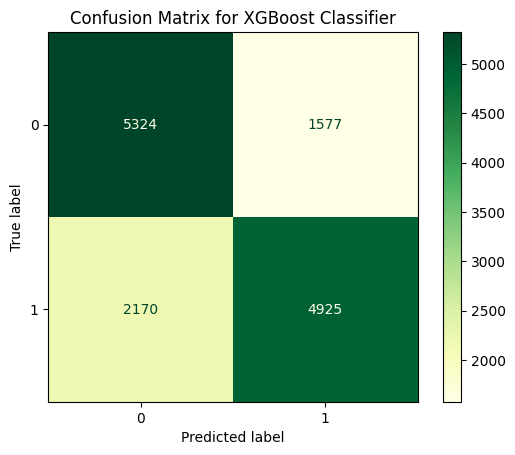

In [ ]:
cm_xgb = confusion_matrix(y_test, xgb_y_pred, labels=xgb_model.classes_)
disp_xgb = ConfusionMatrixDisplay(cm_xgb, display_labels=xgb_model.classes_)
disp_xgb.plot(cmap='YlGn')
plt.title("Confusion Matrix for XGBoost Classifier")
plt.show()